In [1]:
## Notebook for the paper "Dank or Not: Predicting the Popularity of Memes" includes
## Data cleaning and feature engineering steps
## The random forest model's training and results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the full dataset and fill na with descriptive values

df = pd.read_csv("https://raw.githubusercontent.com/TiernonRR/Dank_AIT/get_more_data/text_analysis/dank_data_final.csv")
df = df.drop(labels=['level_0', 'index', 'author', 'awards', 'downs', 'is_nsfw', 'media', 'subreddit', 'subscribers', 'thumbnail.height', 'thumbnail.thumbnail', 'thumbnail.width', 'title', 'ups', 'url', 'datetime_temp', 'time_of_day', 'ups_normed', 'dank_level'],axis=1)
             
dframe = pd.read_csv("https://raw.githubusercontent.com/TiernonRR/Dank_AIT/get_more_data/Data/dank_with_timeOfDay.csv")
im1 = pd.read_json("https://raw.githubusercontent.com/TiernonRR/Dank_AIT/get_more_data/Data/image1_basic.json")
im3 = pd.read_json("https://raw.githubusercontent.com/TiernonRR/Dank_AIT/get_more_data/Data/image3_vgg.json")
im2 = pd.read_json("image2_colr.json")

dfr = pd.merge(dframe,im1, how="inner", on=["id"])
dfr = dfr.merge(im2)
dfr = dfr.merge(im3)
df = dfr.merge(df)

df_orig = df.copy()

df['vgg_feature_1'].fillna(value='couldnt read',inplace=True)
df['vgg_feature_2'].fillna(value='couldnt read',inplace=True)
df['vgg_feature_3'].fillna(value='couldnt read',inplace=True)
df.drop(axis=1,labels='author',inplace=True)

df['vgg1_prob'].fillna(value=0,inplace=True)
df['vgg2_prob'].fillna(value=0,inplace=True)
df['vgg3_prob'].fillna(value=0,inplace=True)

# check which records are still na
file = open("navalues.txt", "w")
file.write(df.isna().sum().to_string())
file.close()

In [5]:
# drop na and duplicate values for clean dataframe

df = df.drop_duplicates(subset=['id'])
df = df.dropna(axis=0, how='any')

df = df.reset_index()
df.shape

In [6]:
# examine what vgg identified image categories are present in top and lowest memes

upper = np.percentile(df['ups_normed'], 95)
lower = np.percentile(df['ups_normed'], 5)
dank = []; drab = []

for i in range(0,len(df['vgg_feature_1'])):
    if df['ups_normed'][i] >= upper:
        dank.append(df['vgg_feature_1'][i])
    if df['ups_normed'][i] <= lower:
        drab.append(df['vgg_feature_1'][i])
        
#for top memes:
from collections import Counter
words_to_count = (word for word in dank if word[:1].isupper())
c = Counter(dank)
most_dank = c.most_common(40)

#for bottom memes
words_to_count = (word for word in drab if word[:1].isupper())
c = Counter(drab)
most_drab = c.most_common(40)

for i in range(0,len(most_dank)):
        print(most_dank[i], most_drab[i])

('web_site', 1663) ('web_site', 1407)
('couldnt read', 386) ('couldnt read', 616)
('comic_book', 224) ('comic_book', 243)
('book_jacket', 135) ('book_jacket', 136)
('envelope', 57) ('scoreboard', 54)
('menu', 49) ('envelope', 52)
('television', 33) ('television', 45)
('scoreboard', 24) ('menu', 29)
('ballplayer', 18) ('monitor', 26)
('stage', 18) ('bulletproof_vest', 25)
('laptop', 17) ('laptop', 25)
('toyshop', 17) ('notebook', 25)
('theater_curtain', 17) ('packet', 25)
('packet', 16) ('lab_coat', 25)
('notebook', 16) ('abaya', 22)
('jigsaw_puzzle', 16) ('theater_curtain', 19)
('balance_beam', 15) ('jigsaw_puzzle', 18)
('lab_coat', 15) ('iron', 17)
('Chihuahua', 14) ('suit', 16)
('suit', 14) ('Band_Aid', 15)
('bathing_cap', 13) ('toyshop', 15)
('military_uniform', 13) ('academic_gown', 14)
('street_sign', 13) ('jersey', 12)
('monitor', 13) ('ballplayer', 12)
('wig', 12) ('digital_clock', 11)
('cash_machine', 12) ('neck_brace', 11)
('slot', 12) ('screen', 11)
('bulletproof_vest', 12) (

In [7]:
# one-hot-encode some of the most common vgg features

toilet_tissue = []
web_site = []
toyshop = []
brassiere = []
balance_beam = []
nipple = []
comic_book = []

for row in range(0, len(df)):
    if df['vgg_feature_1'][row] == 'toilet_tissue' or df['vgg_feature_2'][row] == 'toilet_tissue':
        toilet_tissue.append(1)
    else:
        toilet_tissue.append(0)
        
    if df['vgg_feature_1'][row] == 'web_site' or df['vgg_feature_2'][row] == 'web_site':
        web_site.append(1)
    else:
        web_site.append(0)
        
    if df['vgg_feature_1'][row] == 'comic_book' or df['vgg_feature_2'][row] == 'comic_book':
        comic_book.append(1)
    else:
        comic_book.append(0)
        
    if df['vgg_feature_1'][row] == 'toyshop' or df['vgg_feature_2'][row] == 'toyshop':
        toyshop.append(1)
    else:
        toyshop.append(0)
        
    if df['vgg_feature_1'][row] == 'brassiere' or df['vgg_feature_2'][row] == 'brassiere':
        brassiere.append(1)
    else:
        brassiere.append(0)
        
    if df['vgg_feature_1'][row] == 'balance_beam' or df['vgg_feature_2'][row] == 'balance_beam':
        balance_beam.append(1)
    else:
        balance_beam.append(0)
        
    if df['vgg_feature_1'][row] == 'nipple' or df['vgg_feature_2'][row] == 'nipple':
        nipple.append(1)
    else:
        nipple.append(0)

df['toilet_tissue'] = toilet_tissue
df['web_site'] = web_site
df['comic_book'] = comic_book
df['toyshop'] = toyshop
df['brassiere'] = brassiere
df['balance_beam'] = balance_beam
df['nipple'] = nipple

In [7]:
# add attribute with split + stemmed title

from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

documents = [[ps.stem(word) for word in row.split()] for row in df['title']]
documents = [[i.lower() for i in s] for s in documents]

df['title_split'] =  documents 

# find the most common words in title

from itertools import chain
Counter(chain.from_iterable(df['title_split'])).most_common(500)

In [8]:
# categorize some of the most common words

common_words = [['meme', 'reddit', 'repost', 'meme.', 'comment', 'meme,', 'upvot', 'redditor', 'post'], 
['irl','me_irl','me_irlth'], 
['me_irl', 'irl','me_irlth', 'idk', 'oof', 'doe','litt', 'gotta', 'u', 'lol', 'boi', 'gamer','bruh', 'bro', 'gonna'], 
['pronouns','we', 'us', 'our', "we'r", 'i', "i'm", 'i’m', 'my', "i'll",'you', "you'r", 'you’r', 'your', 'u', 'y’all'], 
['true', 'truth'], 
['feel'], 
['money'], 
['algorithm','youtub'],
['woman', 'dreamgod', 'girl','girlfriend','femal', 'perfect','wife'],
['like'],
['gamer', 'game'], 
['peopl'], 
['first'], 
['pleas'], 
['thank'],
['year', 'month', 'week', 'day'], 
['tp', 'toilet', 'paper'], 
['time'], 
['bad'], 
['fuck', 'f', 'dick','shit','damn', 'ass', 'hell'], 
['school','work','procrastin', 'onlin', 'class'], 
['love','hope'], 
['god'], 
['life','world','global','everyon','everyonethi', 'everyth'], 
['econom', 'crash','berni','dollar', 'stock', 'profit','market', 'bailout', 'sander', 'senat', 'democrat', 'presidenti', 'debat','govern','congress', 'pass', 'govern','privaci'],
['safe', 'save'], 
['brain'], 
['hate'], 
['die','emperor','countri', 'trump','kill','dead'], 
['boomer'], 
['free'],
['hand', 'sanit'], 
['quarantin','isol'],

# below are the final (most important) categories                

['current politics','econom', 'world','global','emperor','countri', 'trump', 'crash','berni','dollar', 'stock', 'profit','market', 'bailout', 'sander', 'senat', 'democrat', 'presidenti', 'debat','govern','congress', 'pass', 'govern','privaci'],
['temporal moment','2020','time','year', 'month', 'week', 'day'], 
['covid culture','distanc', 'social', 'quarantin','isol','hand', 'sanit','tp', 'toilet', 'paper'],
['synonyms, sick','fever', 'cough', 'short','sick', 'health','outbreak','exposur','breath', 'diseas', 'transmiss', 'symptom', 'ill', 'infect','cough'],
['synonyms, covid-19', 'corona', 'coronaviru', 'viru', 'vaccin','covid-19', 'covid','outbreak', 'pandem']] 

In [9]:
# one-hot-encode these categories of words from title

for i in range(0,len(common_words)):
    df[common_words[i][0]] = np.zeros(len(df))

look = list(df['processed_words']) # df['processed_words'],df['title_split']

for i in range(0,len(df)):
    for j in range(0,len(common_words)):
        for k in range(0,len(common_words[j])):
            if look[i].count(common_words[j][k]) > 0:
                df[common_words[j][0]][i] += 1
                
#check
sum(df['love'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


2000.0

In [11]:
# view dataframe to check these added features

df['all_current_words'] = all_current_words
currentevents_and_ups = df[['ups_normed','all_current_words','current politics','temporal moment','covid culture','synonyms, sick','synonyms, covid-19']].copy()
currentevents_and_ups

# save to file to further investigate this data

currentevents_and_ups.to_json(r'./currentevents_and_ups.json')

,ups_normed,all_current_words,current politics,temporal moment,covid culture,"synonyms, sick","synonyms, covid-19"
0,0.000001,1,0.0,1.0,0.0,0.0,0.0
1,0.000036,1,0.0,2.0,2.0,0.0,1.0
2,0.000001,0,0.0,0.0,0.0,0.0,0.0
3,0.000001,1,0.0,1.0,2.0,0.0,0.0
4,0.000001,1,0.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
80357,0.000021,0,0.0,0.0,0.0,0.0,0.0
80358,0.000021,0,0.0,0.0,0.0,0.0,0.0
80359,0.000021,1,1.0,0.0,0.0,1.0,0.0
80360,0.000021,1,0.0,0.0,0.0,1.0,1.0


In [12]:
# sort the most common labels from vgg-id image content into categories (found by searching most common words with functions in next cell)

animals = ['animals','dalmatian','crane','proboscis_monkey','barracouta','Chihuahua', 'Sussex_spaniel','Scotch_terrier','white_wolf','teddy','Pomeranian','Pekinese',
          'golden_retriever','sea_snake','grey_whale','platypus','Great_Dane','borzoi','toy_terrier','Egyptian_cat','jellyfish',
          'Siamese_cat','otter','redbone','vizsla','hammerhead','Chesapeake_Bay_retriever', 'Persian_cat','Indian_cobra','tiger_cat','eel','brown_bear','wire-haired_fox_terrier',
          'Bouvier_des_Flandres','proboscis_monkey','goose','cabbage_butterfly','tailed_frog','pug','American_egret',
          'goose','sea_snake','bloodhound','vulture','tiger_cat','tiger','ice_bear','goldfish','German_shepherd','Lakeland_terrier','weasel',
          'Labrador_retriever','tabby','Arabian_camel','house_finch','grey_fox','Siberian_husky','leafhopper','traffic_light',
          'Boston_bull','king_penguin','African_elephant','Saint_Bernard','teddy','beaver','Samoyed','Saint_Bernard','Arabian_camel','ibex','guinea_pig',
          'Kerry_blue_terrier','badger','bloodhound']

formatted = ['formatted','book_jacket', 'comic_book', 'web_site', 'scoreboard'] 
          

tech = ['tech','analog_clock','digital_clock','hand-held_computer','computer_keyboard','remote_control','iPod','television',
       'printer','refrigerator','cellular_telephone','laptop','oscilloscope','CD_player','stethoscope',
       'desktop_computer','analog_clock','tape_player','sewing_machine',
       'photocopier','espresso_maker','vending_machine','Polaroid_camera'] 

sports = ['sports', 'ballplayer', 'basketball', 'golf_ball','ping-pong_ball','unicycle','racket','volleyball','ski','tricycle']

violent = ['violent','airship','warplane','missile','military_uniform','bulletproof_vest','revolver','torch','hair_spray','volcano','assault_rifle','rifle','power_drill']

food = ['food','bagel','cheeseburger','butternut_squash','French_loaf','dough','beer_bottle','meat_loaf','hotdog','menu','Granny_Smith','ladle','shopping_cart','apron']

vehicle = ['vehicle','sports_car','go-kart','speedboat','racer','freight_car','gondola','limousine','moving_van','bicycle-built-for-two','airship','garbage_truck','golfcart', 'tractor','forklift'] 

masks = ['masks','muzzle','mask','sunglasses','ski_mask','oxygen_mask','gasmask','toilet_tissue','neck_brace'] 

uniforms = ['uniforms','wig','swimming_trunks','bathing_cap','Windsor_tie','cowboy_hat', 'suit','academic_gown','sombrero','abaya','bow_tie','jersey','sweatshirt','diaper','cowboy_hat','lab_coat']

In [13]:
## the following functions can be used to sort the categorical attributes (vgg identified image content and processed
## words from imaged)

# function counts occurrences of certain words in feature (to identify the most common)
def getCategoryCounts(all_features):
    common_categories = []; counts = []
    for f1 in all_features:
        for row in f1:
            if (common_categories.count(row) == 0):
                common_categories.append(row); counts.append(1)
            else:
                counts[common_categories.index(row)] += 1
    return common_categories, counts

# returns the most common categories
def commonCategoriesPlotObj(common_categories, counts):
    counts_to_plot = [max(counts)]; categories_to_plot = [common_categories[counts.index(max(counts))]]
    for i in range(0,60):
        # eliminate the maximum count from the list
        counts = list(filter((max(counts)).__ne__, counts))
        common_categories = list(filter((common_categories[counts.index(max(counts))]).__ne__, common_categories))
        # if it is not already stored, store the next maximum in the plot lists
        if (categories_to_plot.count(common_categories[counts.index(max(counts))]) == 0):
               counts_to_plot.append(max(counts)); categories_to_plot.append(common_categories[counts.index(max(counts))])
    return counts_to_plot, categories_to_plot

# function combines features (parameter) with the categories found
def combineTerms(feature,list_):
    f = list(feature) 
    for i in range(0,len(list_)):
        consider = list_[i]
        for j in range(0,len(consider)):
            while (f.count(consider[j]) > 0):
                f[f.index(consider[j])] = consider[0]
    return f

# test functions / get vars for the vgg identified image content
list_ = [animals,uniforms,vehicle,formatted,sports,violent,tech,food,masks]
f1 = combineTerms(df['vgg_feature_1'],list_); f2 = combineTerms(df['vgg_feature_2'],list_); f3 = combineTerms(df['vgg_feature_3'],list_)

common_categories, counts = getCategoryCounts([f1,f2,f3])
counts_to_plot, categories_to_plot = commonCategoriesPlotObj(common_categories,counts)

In [16]:
# one-hot encode these categories

def oneHotEncode(f1, categories_to_plot):
    hot_encoded = []
    for i in range(0,len(f1)):
        hot_encoded.append([0,0,0,0,0,0,0,0])
        for j in range(0,len(categories_to_plot[0:8])):
            if (f1[i] == categories_to_plot[j]) or (f2[i] == categories_to_plot[j]) or (f3[i] == categories_to_plot[j]):
                hot_encoded[i][j] = 1 
                # note: binary 0/1 could be replaced with the vgg probability
    return hot_encoded

# check and store
hot_encoded = oneHotEncode(f1,categories_to_plot)
for j in range(0,len(categories_to_plot[0:8])):
    df[categories_to_plot[j]] = [row[j] for row in hot_encoded]
df.head()

,level_0,index,awards,created_utc,downs,id,is_nsfw,media,subreddit,subscribers,...,sports,masks,food,formatted,couldnt read,tech,uniforms,animals,violent,monitor
0,1,1,[],1.584487e+09,0,fkf6kd,False,https://i.redd.it/hvwi2hi0fbn41.jpg,r/dank_meme,743610,...,0,0,0,1,0,0,0,0,0,0
1,3,3,[],1.584487e+09,0,fkf5n5,False,https://i.redd.it/ndydkhwsman41.jpg,r/dank_meme,743610,...,0,1,0,0,0,0,0,0,0,0
2,4,4,[],1.584486e+09,0,fkezoq,False,https://i.redd.it/43710pqzcbn41.jpg,r/dank_meme,743610,...,0,0,0,1,0,0,0,0,0,0
3,11,11,[],1.584485e+09,0,fkeliv,False,https://i.redd.it/x15x6thn8bn41.jpg,r/dank_meme,743610,...,0,0,0,1,0,0,0,0,0,0
4,12,12,[],1.584484e+09,0,fkein6,False,https://i.redd.it/cm9zhnbs7bn41.jpg,r/dank_meme,743610,...,0,0,0,1,0,0,0,0,0,0


In [105]:
## format labels into "dank or not" binary for randomForest classification task

import numpy as np

labels_reg = np.array(df['ups_normed']); labels = []
for val in labels_reg:
    if val >= np.percentile(df['ups_normed'], 95):
        labels.append(int(1))
    else:
        labels.append(int(0))
        
labels=np.array(labels)
df['dankorNot'] = labels

data = df
labels = np.array(data['dankorNot'])
print(sum(labels)/len(labels))

0.05001119932306314


In [22]:
# export this final dframe to share with group

df.to_json(r'./final_final_final.json')
df

,level_0,index,awards,created_utc,downs,id,is_nsfw,media,subreddit,subscribers,...,tech,uniforms,animals,food,violent,monitor,vgg_categories_1,vgg_categories_2,vgg_categories_3,dankorNot
0,1,1,[],1.584487e+09,0,fkf6kd,False,https://i.redd.it/hvwi2hi0fbn41.jpg,r/dank_meme,743610,...,0,0,0,0,0,0,0.0,0.0,4.0,0
1,3,3,[],1.584487e+09,0,fkf5n5,False,https://i.redd.it/ndydkhwsman41.jpg,r/dank_meme,743610,...,0,0,0,0,0,0,9.0,9.0,9.0,0
2,4,4,[],1.584486e+09,0,fkezoq,False,https://i.redd.it/43710pqzcbn41.jpg,r/dank_meme,743610,...,0,0,0,0,0,0,0.0,4.0,4.0,0
3,11,11,[],1.584485e+09,0,fkeliv,False,https://i.redd.it/x15x6thn8bn41.jpg,r/dank_meme,743610,...,0,0,0,0,0,0,4.0,0.0,0.0,0
4,12,12,[],1.584484e+09,0,fkein6,False,https://i.redd.it/cm9zhnbs7bn41.jpg,r/dank_meme,743610,...,0,0,0,0,0,0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80357,499301,73595,[],1.584728e+09,0,flzu0d,False,https://i.redd.it/6g9qavnbdvn41.jpg,r/dankmeme,47724,...,1,0,0,0,0,0,0.0,7.0,0.0,0
80358,499303,73597,[],1.584709e+09,0,flulj5,False,https://i.redd.it/40m3iik9stn41.png,r/dankmeme,47724,...,0,1,0,0,0,0,0.0,4.0,2.0,0
80359,499304,73598,[],1.584707e+09,0,flu7j2,False,https://i.redd.it/eqwqdv8omtn41.png,r/dankmeme,47724,...,0,1,0,0,0,0,4.0,2.0,0.0,0
80360,499307,73601,[],1.584702e+09,0,flt2fs,False,https://i.redd.it/2okpdt546tn41.jpg,r/dankmeme,47724,...,1,0,0,0,0,0,0.0,7.0,0.0,0


In [119]:
# all image-based features (comment and uncomment to experiment training the machine with different feature subsets)

#VGG_ID-ed FEATURE CATEGORIES AND PROBS
features = data[['vgg1_prob','vgg2_prob','vgg3_prob']].copy() 
features['vggs: violent'] = data['violent']; 
features['vggs: food'] = data['food']; #
features['vggs: uniforms'] = data['uniforms'];
features['vggs: formatted'] = data['formatted']; 
features['vggs: animals'] = data['animals'];
features['vggs: tech'] = data['tech']
features['vgg: monitor'] = data['monitor']
features['vggs: sports'] = data['sports']
features['vggs: vehicle'] = data['vehicle']
features['vggs: masks'] = data['masks']
features['vggs: food'] = data['food']

#features['vgg1_prob'] = data['vgg1_prob']; 
#features['vgg2_prob'] = data['vgg2_prob']; 
#features['vgg2_prob'] = data['vgg2_prob']; 


# MOST COMMON VGG FEATURES
features['vgg: "web_site"'] = data['web_site']; 
features['vgg: "toilet_tissue"'] = data['toilet_tissue'];
features['vgg: "comic_book"'] = data['comic_book']; 
features['vgg: "toyshop"'] = data['toyshop']; 
features['vgg: "brassiere"'] = data['brassiere']
features['vgg: "balance_beam"'] = data['balance_beam']
features['vgg: "nipple"'] = data['nipple']

# COLORS AND HSV
features['avg_hue'] = data['avg_hue']; 
features['avg_saturation'] = data['avg_saturation']; #
features['avg_value'] = data['avg_value']; 
#features['avg_redRGB'] = data['avg_redRGB']; 
features['color: off-white'] = data['off-white'];
features['color: aqua'] = data['aqua']; 
features['color: mustard'] = data['mustard']; 
features['color: pure-black'] = data['pure-black'];
features['color: purple'] = data['purple'] 
features['color: red-brown'] = data['red-brown']; #
features['color: dust-brown'] = data['dust-brown']; #
features['color: gray-blue'] = data['gray-blue']; #
features['color: orange'] = data['orange']; #
features['color: salmon'] = data['salmon']; #
features['color: gray'] = data['gray']; #
features[ 'color: siena-brown'] = data['siena-brown']; #
features[ 'color: gold'] = data['gold']; #
features[ 'color: pure-red'] = data['pure-red']; #
features[ 'color: pure-green'] = data['pure-green']; #
features['color: pure-blue'] = data['pure-blue']; 
features['color: coral'] = data['coral']; #
features['color: pink'] = data['pink']; #
features['color: peach'] = data['peach']; #
features['color: turquoise'] = data['col'] 
features['color: dark-green'] = data['dark-green']; #
#features['color: avg_blueRGB'] = data['avg_blueRGB']; #
#features['color: avg_greenRGB'] = data['avg_greenRGB']; #
features['color: pure-white'] = data['pure-white']; #
features['color: yellow-green'] = data['yellow-green']; #
features['color: bright-yellow'] = data['bright-yellow']; #
features['color: teal'] = data['teal']; #
features['color: cyan'] = data['cyan']; #
features[ 'color: maroon'] = data['maroon']; #
features[ 'color: purple'] = data['purple']; 
features['color: olive'] = data['olive']; #
features['color: light-blue'] = data['light-blue']; #
features['color: plum'] = data['plum'] #

In [120]:
# all text-based features 

# ONE_HOT TITLE
features['text: synonyms, covid-19'] = data['synonyms, covid-19']
features['text: current politics'] = data['current politics']
features['text: temporal moment'] = data['temporal moment']
features['text: covid culture'] = data['covid culture'] 
features['text: slang, abreviations'] = data['me_irl'] #
features['text: synonyms, sick'] = data['synonyms, sick']
features['text: about memes'] = data['meme']
features['text: pronouns'] = data['pronouns']
features['text: world events'] = data['all_current_words']

features['text: "algorithm"'] = data['algorithm']
features['text: "time"'] = data['time']
features['text: "feel"'] = data['feel']
features['text: "money"'] = data['money']
features['text: "woman"'] = data['woman']
features['text: "like"'] = data['like']
features['text: "gamer"'] = data['gamer']
#features['distanc'] = data['distanc']
#features['toilet'] = data['toilet']
features['text: "hand"'] = data['hand']
features['text: "true"'] = data['true']
features['text: "peopl"'] = data['peopl']
features['text: "first"'] = data['first']
features['text: "pleas"'] = data['pleas']
#features['2020'] = data['2020']
features['text: "thank"'] = data['thank']
features['text: "quarantin"'] = data['quarantin']
features['text: "bad"'] = data['bad']
#features['text: year'] = data['year']
features['text: "fuck"'] = data['fuck']
features['text: "school"'] = data['school']
features['text: "love"'] = data['love']
features['text: "god"'] = data['god']
features['text: "life"'] = data['life']
features['text: "safe"'] = data['safe']
features['text: "brain"'] = data['brain']
#features['text: econom'] = data['econom']
features['text: "hate"'] = data['hate']
features['text: "die"'] = data['die']
features['text: "boomer"'] = data['boomer']
features['text: "free"'] = data['free']

features['TextLength'] = data['TextLength']
features['word_count'] = data['word_count']
features['Sentiment'] = data['Sentiment']
#features['common_words'] = data['common_words']

In [ ]:
# all other features 

features['subscribers'] = data['subscribers']; 
features[ 'created_utc'] = data['created_utc']; 
features[ 'is_nsfw'] = data['is_nsfw']; 
features[ 'time_of_day'] = data['time_of_day']; 
features['thumbnail.width'] = data['thumbnail.width']
features['thumbnail.height'] = data['thumbnail.height']

In [122]:
# convert features list to numpy array

feature_list = list(features.columns)
features = np.array(features)
features.shape

(80362, 96)

In [48]:
# OPTIONAL: add weights for imbalanced data

# method one:
#weights = data['dankorNot'].value_counts()/len(data)
#weights = dict(weights)

# method 2:
#from sklearn.utils import class_weight

#class_weight = class_weight.compute_class_weight('balanced',
#                                                np.unique(labels),
#                                               labels)

In [192]:
# OPTIONAL: try model with over sampled data

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(features, labels)
features, labels = X_resampled, y_resampled

In [122]:
# OPTIONAL: try model with under sampled data

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(features, labels)
X_resampled, y_resampled = rus.fit_sample(features, labels)
features, labels = X_resampled, y_resampled

In [110]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42, stratify=labels)

# check that labels are correctly stratified
print(sum(test_labels)/len(test_labels))

0.05


In [111]:
# Instantiate a baseline model: imlearn (for unbalanced data)
from imblearn.ensemble import BalancedRandomForestClassifier

clf=BalancedRandomForestClassifier(bootstrap= True, max_depth= 15, min_samples_split= 20, n_estimators= 350, sampling_strategy=0.7) 
#max_depth = 12, min_samples_leaf = 300, n_estimators=200)

#Train the model 
clf.fit(train_features,train_labels)

BalancedRandomForestClassifier(max_depth=15, min_samples_split=20,
                               n_estimators=350, sampling_strategy=0.7)

In [112]:
# Get results for test features
y_pred=clf.predict(test_features)

# Calculate metrics

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision: ",metrics.precision_score(test_labels, y_pred))
print("Recall: ",metrics.recall_score(test_labels, y_pred))
print("F-1 Score: ",metrics.f1_score(test_labels, y_pred))

Accuracy: 0.8552790346907994
Precision:  0.11234567901234568
Recall:  0.27450980392156865
F-1 Score:  0.15943933420937362


No handles with labels found to put in legend.


AUC= 0.6773588087661465


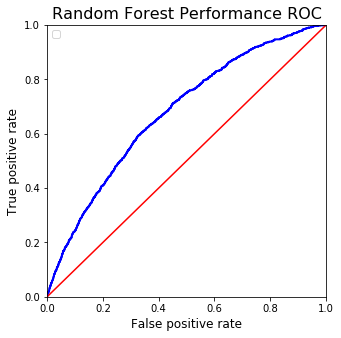

In [113]:
y_pred = clf.predict_proba(test_features)
fpr, tpr, thresholds = metrics.roc_curve(test_labels, y_pred[:,1], pos_label=1, sample_weight=None)
auc = metrics.roc_auc_score(test_labels, y_pred[:,1], sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('Random Forest Performance ROC', fontsize=16)
plt.show()

[0.029199954148613587, 0.02802565256765503, 0.027025279384592836, 0.001748821943983644, 0.0022782085471379845, 0.0025724629623096176, 0.0034737691381402135, 0.001940772673316746, 0.0026577015551367887, 0.0014861535207885811, 0.0015480191751185244, 0.0009114199081528196, 0.001235962417164398, 0.005710481187537711, 0.00012681996824948007, 0.0024922813511579645, 0.0005383012585175927, 0.0002545244301906034, 0.0002589337259659336, 8.560358179734378e-05, 0.032216962041106204, 0.031244214710542225, 0.036236960986435654, 0.0376432777704516, 0.00914356784412729, 0.007764260021861193, 0.03721600240433008, 0.0, 0.022056085998634244, 0.026195962071924334, 0.025545723971003586, 0.013842927557276771, 0.018554967215775275, 0.0404549974265237, 0.0, 0.023845970757620266, 0.0008854377885250826, 0.012288827391424681, 0.003687707526776921, 0.0, 0.0, 0.018452336474154226, 0.026994115899017054, 0.013699793358423253, 0.0, 0.004234079776908478, 0.0010547542933497006, 0.015568350615796218, 0.00780734311746638

Text(0.5, 0, 'Importance')

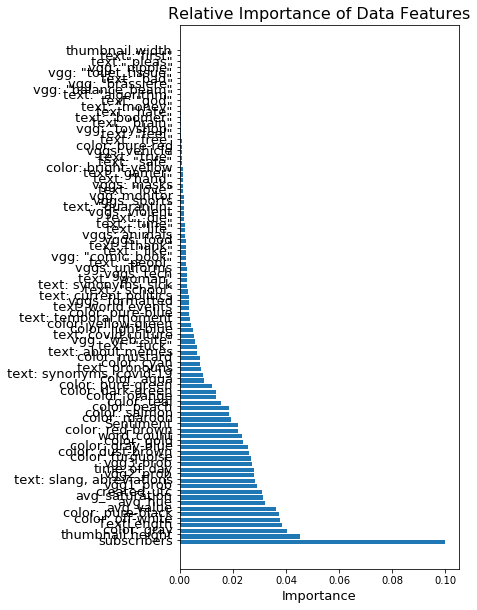

In [104]:
# Get features importances

# tree visualization
from sklearn.tree import export_graphviz
tree = clf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Get numerical feature importances
importances = list(clf.feature_importances_) # List of tuples, "variable - importance"
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)] # sort features by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# list with 0-importance features eliminated for plotting
plot_feature_importances = []
for i in range(0,len(feature_importances)):
    if (feature_importances[i][1] > 0.0):
        plot_feature_importances.append(feature_importances[i])
        
# display feature importance on plot
x = []; y = []
for i in range(0, len(plot_feature_importances)):
    x.append(plot_feature_importances[i][0])
    y.append(plot_feature_importances[i][1])

fig, ax = plt.subplots(figsize=(5,10))
width = 0.75
ind = np.arange(len(y))
plt.barh(ind,y,width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False,fontsize=13)
plt.title('Relative Importance of Data Features',fontsize=16)
plt.xlabel('Importance',fontsize=13)

In [66]:
# Export ROC and feature importance data for plotting
export_ROC1 = {'fpr': fpr, 'tpr': tpr}
export_ROC1 = pd.DataFrame(export_ROC1)
plot_feature_importances = pd.DataFrame(plot_feature_importances)

export_ROC1.to_json(r'./ROC_undersampled.json')
plot_feature_importances.to_json(r'./feature_importances_undersampled.json')

In [ ]:
# OPTIONAL: search for best random forest parameters with randomSearch

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(train_features, train_labels)
rf_random.best_params_

In [ ]:
# OPTIONAL: search for best random forest parameters with gridSearch and crossValScore
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    'max_depth': [7, 12, 15, 18, 20,25],
    #'max_features': [5, 10, 15],
    'min_samples_leaf': [50, 100, 150, 300, 500],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100,150, 200, 250, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.6min
